##### Created on 05/17/2022

##### This notebook is to get the GCM wind vs M relationship for the oceans over 30N to 70N. Will be compared with MERRA2+MAC and PPE outputs. Improved from 'GCMwindVsM-daily'

##### Updating to retrieve PPE daily data and gcm daily data. Used PSL/SST

##### 5/18/2022 Updating to check 50S to 50N gcms and PPE

##### 5/19/2022 Updating to check 50S to 50N observations in theta at 800hPa


### Conclusions:

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from readGCMs import read_var_mod
import calendar
from global_land_mask import globe
import glob

In [2]:
#####Constants
Cp = 1004           #J/kg/K
Rd = 287            #J/kg/K
con= Rd/Cp

In [3]:
con

0.2858565737051793

# GCM

In [75]:
modname = ['CESM2','CNRM-CM6-1','CESM2-WACCM',
           'HadGEM3-GC31-LL','NorESM2-LM']
varname = ['sfcWind', 'tas','psl'] #'sfcWind', 'hfss', 'hfls', 'tas', 'ps', 'psl',,'pr'
pvarname= ['ta']
conname = ['NCAR', 'CNRM-CERFACS','NCAR', 'MOHC', 'NCC'] 
ensname = ['r11i1p1f1', 'r1i1p1f2', 'r1i1p1f1', 
           'r1i1p1f3', 'r1i1p1f1']
ggname  = ['gn', 'gr','gn', 'gn', 'gn']

In [76]:
l=0

In [77]:
# try:
for j in range(l,len(modname)): #

    for i in varname: 
        locals()[i+'__'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=i, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2009, 12, 1], time2=[2012, 12, 31])
        print(i)
    for k in pvarname: 
        locals()[k+'__'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=k, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=True, time1=[2009, 12, 1], time2=[2012, 12, 31])
        print(k)
    print(modname[j])
        
# except IndexError:
#     print(str(j+1)+' not available')
    

/glade/work/geethma/research/codes/readGCMs.py:118: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data = f.variables[varnm][ind]


sfcWind
tas
psl
ta
CESM2
sfcWind
tas
psl
ta
CNRM-CM6-1
sfcWind
tas
psl
ta
CESM2-WACCM
sfcWind
tas
psl
ta
HadGEM3-GC31-LL
sfcWind
tas
psl
ta
NorESM2-LM


In [78]:
# i = l
for i in range(l,1):
    lat  = locals()['sfcWind__'+str(i+1)][2]
    lon  = locals()['sfcWind__'+str(i+1)][3]
    time = locals()['sfcWind__'+str(i+1)][4]

    for j in varname:
        locals()[j+str(i+1)] = locals()[j+'__'+str(i+1)][0]
# 
    for k in pvarname:
        locals()[k+str(i+1)] = locals()[k+'__'+str(i+1)][0]
        locals()['lev'+str(i+1)] = locals()['ta__'+str(i+1)][1]

In [79]:
lev1

[masked_array(data=[100000.,  85000.,  70000.,  50000.,  25000.,  10000.,
                      5000.,   1000.],
              mask=False,
        fill_value=1e+20)]

In [30]:
print(len(time))
print(time)

38
[[2.011e+03 4.000e+00 2.000e+00]
 [2.011e+03 5.000e+00 1.000e+00]
 [2.011e+03 6.000e+00 1.000e+00]
 [2.011e+03 7.000e+00 1.000e+00]
 [2.011e+03 8.000e+00 1.000e+00]
 [2.011e+03 9.000e+00 1.000e+00]
 [2.011e+03 1.000e+01 1.000e+00]
 [2.011e+03 1.100e+01 1.000e+00]
 [2.011e+03 1.200e+01 1.000e+00]
 [2.012e+03 1.000e+00 1.000e+00]
 [2.012e+03 2.000e+00 1.000e+00]
 [2.012e+03 3.000e+00 1.000e+00]
 [2.012e+03 4.000e+00 1.000e+00]
 [2.012e+03 5.000e+00 1.000e+00]
 [2.012e+03 6.000e+00 1.000e+00]
 [2.012e+03 7.000e+00 1.000e+00]
 [2.012e+03 8.000e+00 1.000e+00]
 [2.012e+03 9.000e+00 1.000e+00]
 [2.012e+03 1.000e+01 1.000e+00]
 [2.012e+03 1.100e+01 1.000e+00]
 [2.012e+03 1.200e+01 1.000e+00]
 [2.013e+03 1.000e+00 1.000e+00]
 [2.013e+03 2.000e+00 1.000e+00]
 [2.013e+03 3.000e+00 1.000e+00]
 [2.013e+03 4.000e+00 1.000e+00]
 [2.013e+03 5.000e+00 1.000e+00]
 [2.013e+03 6.000e+00 1.000e+00]
 [2.013e+03 7.000e+00 1.000e+00]
 [2.013e+03 8.000e+00 1.000e+00]
 [2.013e+03 9.000e+00 1.000e+00]
 [2.013

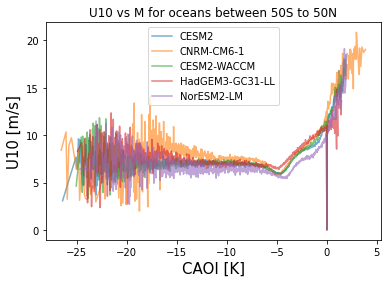

In [9]:
l=0
for i in range(l,len(modname)):
    lat  = locals()['sfcWind__'+str(i+1)][2]
    lon  = locals()['sfcWind__'+str(i+1)][3]
    time = locals()['sfcWind__'+str(i+1)][4]

    for j in varname:
        locals()[j+str(i+1)] = locals()[j+'__'+str(i+1)][0]

    for k in pvarname:
        locals()[k+str(i+1)] = locals()[k+'__'+str(i+1)][0]
        locals()['lev'+str(i+1)] = locals()['ta__'+str(i+1)][1]
    
    x_lat = np.array(lat)
    lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (-50)).argmin()])[0]
    lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (50)).argmin()])[0]    
    lats = lat[lat_ind1[0]:lat_ind2[0]]

    x_lon = lon
    
    maskm = np.ones((len(time),len(lats),len(lon)))

    for a in range(len(lats)):
        for b in range(len(lon)):
            if globe.is_land(lats[a], lon[b])==True:
                maskm[:,a,b] = 0
    
    theta_850 = locals()['ta'+str(i+1)][:,1,:,:]*(locals()['psl'+str(i+1)]/85000)**con
    M = locals()['tas'+str(i+1)] - theta_850
    
    x_sfcWind = locals()['sfcWind'+str(i+1)]
    m_sfcWind = x_sfcWind[:,lat_ind1[0]:lat_ind2[0],:]
    lats = lat[lat_ind1[0]:lat_ind2[0]]

    x_M = M
    m_M = x_M[:,lat_ind1[0]:lat_ind2[0],:]
    
    cao = np.array(m_M)
    sw  = np.array(m_sfcWind)
    
    plot_CAOI = np.array(np.multiply(maskm,cao))
    wind      = np.array(np.multiply(maskm,sw))
    
    pl_theta  = plot_CAOI.reshape(-1)
    pl_wind   = wind.reshape(-1)
    
    plot_theta = pl_theta[pl_theta>-40]
    plot_wind  = pl_wind[pl_theta>-40]
    
    ind = np.argsort(plot_theta)
    xx = np.sort(plot_theta)
    yy = plot_wind[ind]
    
    indx = np.isnan(xx*yy)==False
    
    from scipy import stats
    bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)

    index = np.isnan(bin_means_x*bin_means)==False
    
    plt.plot(bin_means_x[index], bin_means[index], label=modname[i], alpha=0.6)

plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
plt.title('U10 vs M for oceans between 50S to 50N')
plt.savefig('../figures/U10vsM_50S_50N.png')

In [10]:
# from skmisc.loess import loess
# index = np.isnan(bin_means_x*bin_means)==False

# # plt.plot(bin_means_x, bin_means)
# l = loess(bin_means_x[index], bin_means[index])
# l.fit()
# pred = l.predict(bin_means_x[index], stderror=True)
# conf = pred.confidence()

# lowess = pred.values
# plt.plot(bin_means_x[index], lowess)
# plt.ylabel('U10 [m/s]',fontsize='15')
# plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('GCM-CESM2')

In [ ]:
# bin_means_x_gcm = bin_means_x[index]
# bin_means_gcm   = lowess

In [ ]:
# x_gcm = []
# y_gcm = []


In [ ]:
# x_gcm.append(bin_means_x_gcm)
# y_gcm.append(bin_means_gcm)

# Observations

In [38]:
import glob
merlist = np.sort(glob.glob('../data_merra/all_lat_lon/levels/MERRA2_*.nc'))
sfclist = np.sort(glob.glob('../data_merra/all_lat_lon/surface/MERRA2_*.nc'))
maclist = np.sort(glob.glob('../MACLWP_dailymean/take/wind1deg*.nc4'))

In [55]:
import netCDF4 as nc
import xarray as xr
p_mer_T   = []
p_mac_w   = []
sfc_mer_T = []
sfc_mer_P = []

for i in range(len(merlist)): #len(merlist)
    d_path = merlist[i]
    data   = nc.Dataset(d_path)
    # print(d_path)
    
    if i==0:
        merlat = data.variables['lat'][:]
        merlon = data.variables['lon'][:]
        merlev = data.variables['lev'][:]
        #shape latitude
        mer_lat = np.flip(merlat)
        mer_lat = np.array(mer_lat)
        mlat_ind1 = np.where(mer_lat == mer_lat.flat[np.abs(mer_lat - (-50)).argmin()])[0]
        mlat_ind2 = np.where(mer_lat == mer_lat.flat[np.abs(mer_lat - (50)).argmin()])[0]
        p_mer_lat  = np.array(mer_lat[mlat_ind1[0]:mlat_ind2[0]])
        #shape longitude
        merlon[merlon > 180] = merlon[merlon > 180]-360
        mer_lon = np.array(merlon)
        
    merT   = data.variables['T'][:] #(time, lev, lat, lon)
    mer_T = np.array(merT[:,:,::-1,:])
    p_mer_T.extend(mer_T[:,:,mlat_ind1[0]:mlat_ind2[0],:])
    
temp = np.array(p_mer_T)

for i in range(len(sfclist)): #len(merlist)
    s_path = sfclist[i]
    sdata  = nc.Dataset(s_path)
    # print(d_path)
    
    if i==0:
        sfclat = sdata.variables['lat'][:]
        sfclon = data.variables['lon'][:]
        #shape latitude
        sfc_lat = np.flip(sfclat)
        sfc_lat = np.array(sfc_lat)
        flat_ind1 = np.where(sfc_lat == sfc_lat.flat[np.abs(sfc_lat - (-50)).argmin()])[0]
        flat_ind2 = np.where(sfc_lat == sfc_lat.flat[np.abs(sfc_lat - (50)).argmin()])[0]
        p_sfc_lat  = np.array(sfc_lat[flat_ind1[0]:flat_ind2[0]])
        #shape longitude
        sfclon[sfclon > 180] = sfclon[sfclon > 180]-360
        sfc_lon = np.array(sfclon)
        
    sfcT   = sdata.variables['TS'][:] 
    sfc_T = np.array(sfcT[:,::-1,:])
    sfc_mer_T.extend(sfc_T[:,flat_ind1[0]:flat_ind2[0],:])
    
    sfcP   = sdata.variables['SLP'][:] 
    sfc_P = np.array(sfcP[:,::-1,:])
    sfc_mer_P.extend(sfc_P[:,flat_ind1[0]:flat_ind2[0],:])
    
sfctemp = np.array(sfc_mer_T)
sfcpres = np.array(sfc_mer_P)

for i in range(len(maclist)): #len(maclist)
    ddpath = maclist[i]
    ddata  = nc.Dataset(ddpath)
    macw   = ddata.variables['sfcwind'][:] #(time,lat,lon)
    # print(ddpath)
    
    if i==0:
        maclat = ddata.variables['lat'][:]
        maclon = ddata.variables['lon'][:]
        #shape latitude
        mac_lat = np.array(maclat)
        slat_ind1 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (-50)).argmin()])[0]
        slat_ind2 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (50)).argmin()])[0]
        p_mac_lat  = np.array(mac_lat[slat_ind1[0]:slat_ind2[0]])
        #shape longitude
        maclon[maclon > 180] = maclon[maclon > 180]-360
        mac_lon = np.array(maclon)

    n_w = macw[:,slat_ind1[0]:slat_ind2[0],:]
    p_mac_w.extend(n_w)

wind = np.array(p_mac_w)


In [56]:
print(p_sfc_lat[0],p_sfc_lat[-1])
print(p_mer_lat[0],p_mer_lat[-1])
print(p_mac_lat[0],p_mac_lat[-1])
print(sfc_lon[0],sfc_lon[-1])
print(mer_lon[0],mer_lon[-1])
print(mac_lon[0],mac_lon[-1])

-50.5 48.5
-50.5 48.5
-50.5 48.5
0.5 -0.5
0.5 -0.5
0.5 -0.5


In [57]:
print(np.shape(temp), np.shape(sfctemp), np.shape(sfcpres), np.shape(wind))

(1096, 3, 100, 360) (1096, 100, 360) (1096, 100, 360) (1096, 100, 360)


In [81]:
p_level = 1

In [102]:
merlev

masked_array(data=[850., 800., 750.],
             mask=False,
       fill_value=1e+20)

In [85]:
theta = np.array(np.multiply(temp[:,p_level,:,:], (sfcpres/(merlev[p_level]*100))**(Rd/Cp)))


In [86]:
p_CAOI = np.array(np.subtract(sfctemp,theta))


In [61]:
len(temp)

1096

In [64]:
maskm = np.ones((len(temp),len(p_mer_lat),len(mer_lon)))

for a in range(len(p_mer_lat)):
    for b in range(len(mer_lon)):
        if globe.is_land(p_mer_lat[a], mer_lon[b])==True:
            maskm[:,a,b] = 0

In [65]:
plot_CAOI = np.array(np.multiply(maskm,p_CAOI))
plot_wind = np.array(np.multiply(maskm,wind))


In [66]:
plot_mer_theta = plot_CAOI.ravel()
plot_mac_wind  = plot_wind.ravel()

In [67]:
print(np.min(plot_mer_theta), np.min(plot_mac_wind))

-31.93046018821991 -99.98999786376953


In [68]:
ind = np.argsort(plot_mer_theta)
xx = np.sort(plot_mer_theta)
yy = plot_mac_wind[ind]

In [69]:
x_new = xx[xx<np.max(xx)]
y_new = yy[xx<np.max(xx)]

xx_new = x_new[y_new>0]
yy_new = y_new[y_new>0]

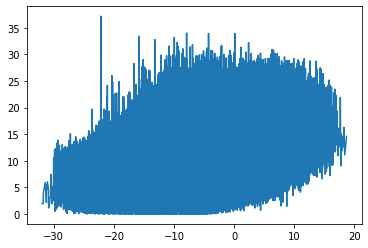

In [70]:
plt.plot(xx_new,yy_new)

In [71]:
indx = np.isnan(xx_new*yy_new)==False

In [72]:
bin_means, bin_edges, binnumber = stats.binned_statistic(xx_new, yy_new, 'mean', bins=500)
bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx_new, xx_new, 'mean', bins=500)


In [73]:
index = np.isnan(bin_means_x*bin_means)==False

In [95]:
yti = str(int(merlev[p_level]))

In [96]:
yti

'800'

## 50S 50N oceans theta 800hPa

Text(0.5, 1.0, '50S 50N oceans theta 800')

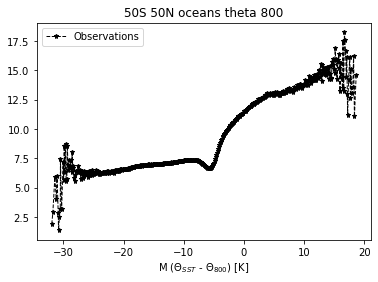

In [101]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()
yti = str(int(merlev[p_level]))
plt.xlabel(r"M ($\Theta_{SST}$ - $\Theta_{"+yti+"})$ [K]")
plt.title('50S 50N oceans theta 800')

## 30N 70N oceans theta 850hPa

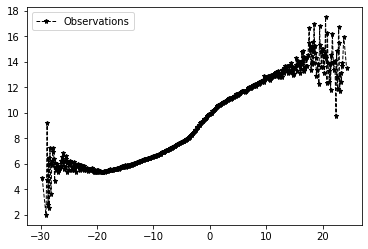

In [34]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()

In [ ]:
bin_means_x_obs = bin_means_x[index]
bin_means_obs   = lowess

In [ ]:
fig= plt.figure(figsize=(5, 6))
plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
plt.xticks(np.arange(-20,6,5),fontsize='12')
plt.yticks(np.arange(4,13),fontsize='12')
plt.xlim([-20,5])
plt.ylim([3,13])
plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('MACLWP wind vs MERRA2 M\nfor 30N to 70N ocean only\n850hPa')

# PPE

In [35]:
enn = np.arange(201,251)

In [36]:
ppe_var = ['U10', 'PSL', 'T850','TREFHT']

In [37]:
for en in enn:
    if en != 175:
        for i in ppe_var: #TREFHT was used since no TS. Should double check this.
            d_path = '/glade/campaign/cgd/projects/ppe/cam_ppe/rerun_PPE_250/PD/PD_timeseries/PPE_250_ensemble_PD.'+f'{en:03d}'+'/atm/hist/cc_PPE_250_ensemble_PD.'+f'{en:03d}'+'.h1.'+str(i)+'.nc'
            data =xr.open_dataset(d_path)

            if en == enn[0]:
                lon  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
                lat  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
                time = data.variables['time'][:] #(time: 36)

            locals()[str(en)+'_'+i] = data.variables[i][:]

In [38]:
x_lat = np.array(lat)
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (30)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (70)).argmin()])[0]
lat_new  = lat[lat_ind1[0]:lat_ind2[0]]

mask = np.ones((1096,len(lat_new),len(lon)))

for a in range(len(lat_new)):
    for b in range(len(lon)):
        if globe.is_land(lat_new[a], lon[b]-180.)==True:
            mask[:,a,b] = 0

for en in enn:
    if en != 175:
        # print(en)
        for i in ppe_var: #
            tmp  = locals()[str(en)+'_'+i]
            tmp2 = tmp[0:1096,lat_ind1[0]:lat_ind2[0],:]
            locals()['MID'+i+'_'+str(en)] = np.multiply(mask,tmp2)

In [39]:
for en in enn:
    if en != 175:
        locals()['theta_850_'+str(en)] = np.multiply(locals()['MIDT850_'+str(en)],(np.divide(locals()['MIDPSL_'+str(en)],85000))**(Rd/Cp))

In [ ]:
np.shape(theta_850_247)

In [40]:
for en in enn:
    if en != 175:
        locals()['M_'+str(en)]   = np.array(np.subtract(locals()['MIDTREFHT_'+str(en)],locals()['theta_850_'+str(en)])).reshape(-1)
        locals()['U10_'+str(en)] = np.array(locals()['MIDU10_'+str(en)]).reshape(-1)

In [ ]:
np.max(U10_246)

In [ ]:
from scipy import stats
from skmisc.loess import loess

Text(0.5, 0, 'CAOI [K]')

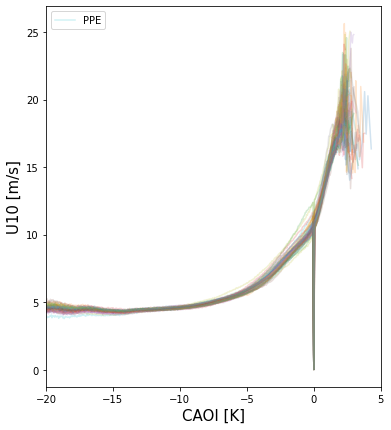

In [42]:
fig= plt.figure(figsize=(6, 7))
# plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='CESM2') #marker='*', markersize=12,
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
for en in enn:
    if en != 175:
        x = locals()['M_'+str(en)]
        y = locals()['U10_'+str(en)]
        ind = np.argsort(x)
        xx = np.sort(x)
        yy = y[ind]

        indx = np.isnan(xx*yy)==False

        bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
        bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)

        index = np.isnan(bin_means_x*bin_means)==False

        # plt.plot(bin_means_x, bin_means)
#         l = loess(bin_means_x[index], bin_means[index])
#         l.fit()
#         pred = l.predict(bin_means_x[index], stderror=True)
#         conf = pred.confidence()

#         lowess = pred.values


        if en==250:
            plt.plot(bin_means_x[index], bin_means[index], alpha=0.2,label='PPE')

        else:
            plt.plot(bin_means_x[index], bin_means[index], alpha=0.2)
    

# plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
# plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
# plt.xticks(np.arange(-20,6,5),fontsize='12')
# plt.yticks(np.arange(4,13),fontsize='12')
# plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='CESM2')
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
plt.xlim([-20,5])

plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('CAM6 PPE')
# plt.savefig('ppe.png')